# Homework 3

In [8]:
# Import necessary libraries

# numerical libs
import pandas as pd
import numpy as np

# plotting libs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
from sklearn.tree import export_graphviz
import graphviz

# model libs
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 

Generate dataset using make_classification function in the sklearn.datasets class.

Generate 10000 samples with 8 features (X) with one label (y). 

Also, use following parameters:

n_informative = 5

class_sep = 2

random_state = 42

In [9]:
# Generate dataset using make_classification function in the sklearn. 
# Convert it into pandas dataframe.
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features=8, n_informative=5, class_sep=2, random_state=42)

In [12]:
X = pd.DataFrame(X)
y = pd.Series(y)

In [13]:
X

,0,1,2,3,4,5,6,7
0,-0.475055,1.455643,-1.571111,-2.233576,-2.272510,-0.478333,0.012107,-1.616344
1,1.578351,4.611229,-0.527495,-1.868875,2.921311,-1.783386,3.431662,-0.178611
2,-2.677604,0.619333,-0.260753,1.768409,1.511900,-1.552257,1.182059,1.810524
3,0.379412,0.879235,-0.787970,-0.457057,3.388700,1.787840,4.294263,0.427934
4,-3.645689,3.371521,-2.061152,-1.314058,-0.169329,-2.487230,2.144342,-0.733770
...,...,...,...,...,...,...,...,...
9995,-2.399057,2.275687,-0.345061,0.629983,3.397411,-1.502344,3.098817,0.583324
9996,-1.487918,2.273560,-1.152804,2.062795,-0.571202,-5.398310,-2.426969,2.455303
9997,0.425978,4.298317,0.536100,-1.266725,1.370092,-3.187447,1.306534,-0.254036
9998,-1.182084,0.628536,0.848320,4.571744,3.057226,-4.759462,-2.439117,3.182019


In [14]:
y

0       0
1       1
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Length: 10000, dtype: int64

Explore and analyse raw data.

In [16]:
# Check duplicate values and missing data.
X.duplicated().sum()

0

In [18]:
X.isna().sum().sum()

0

Do preprocessing for classification.

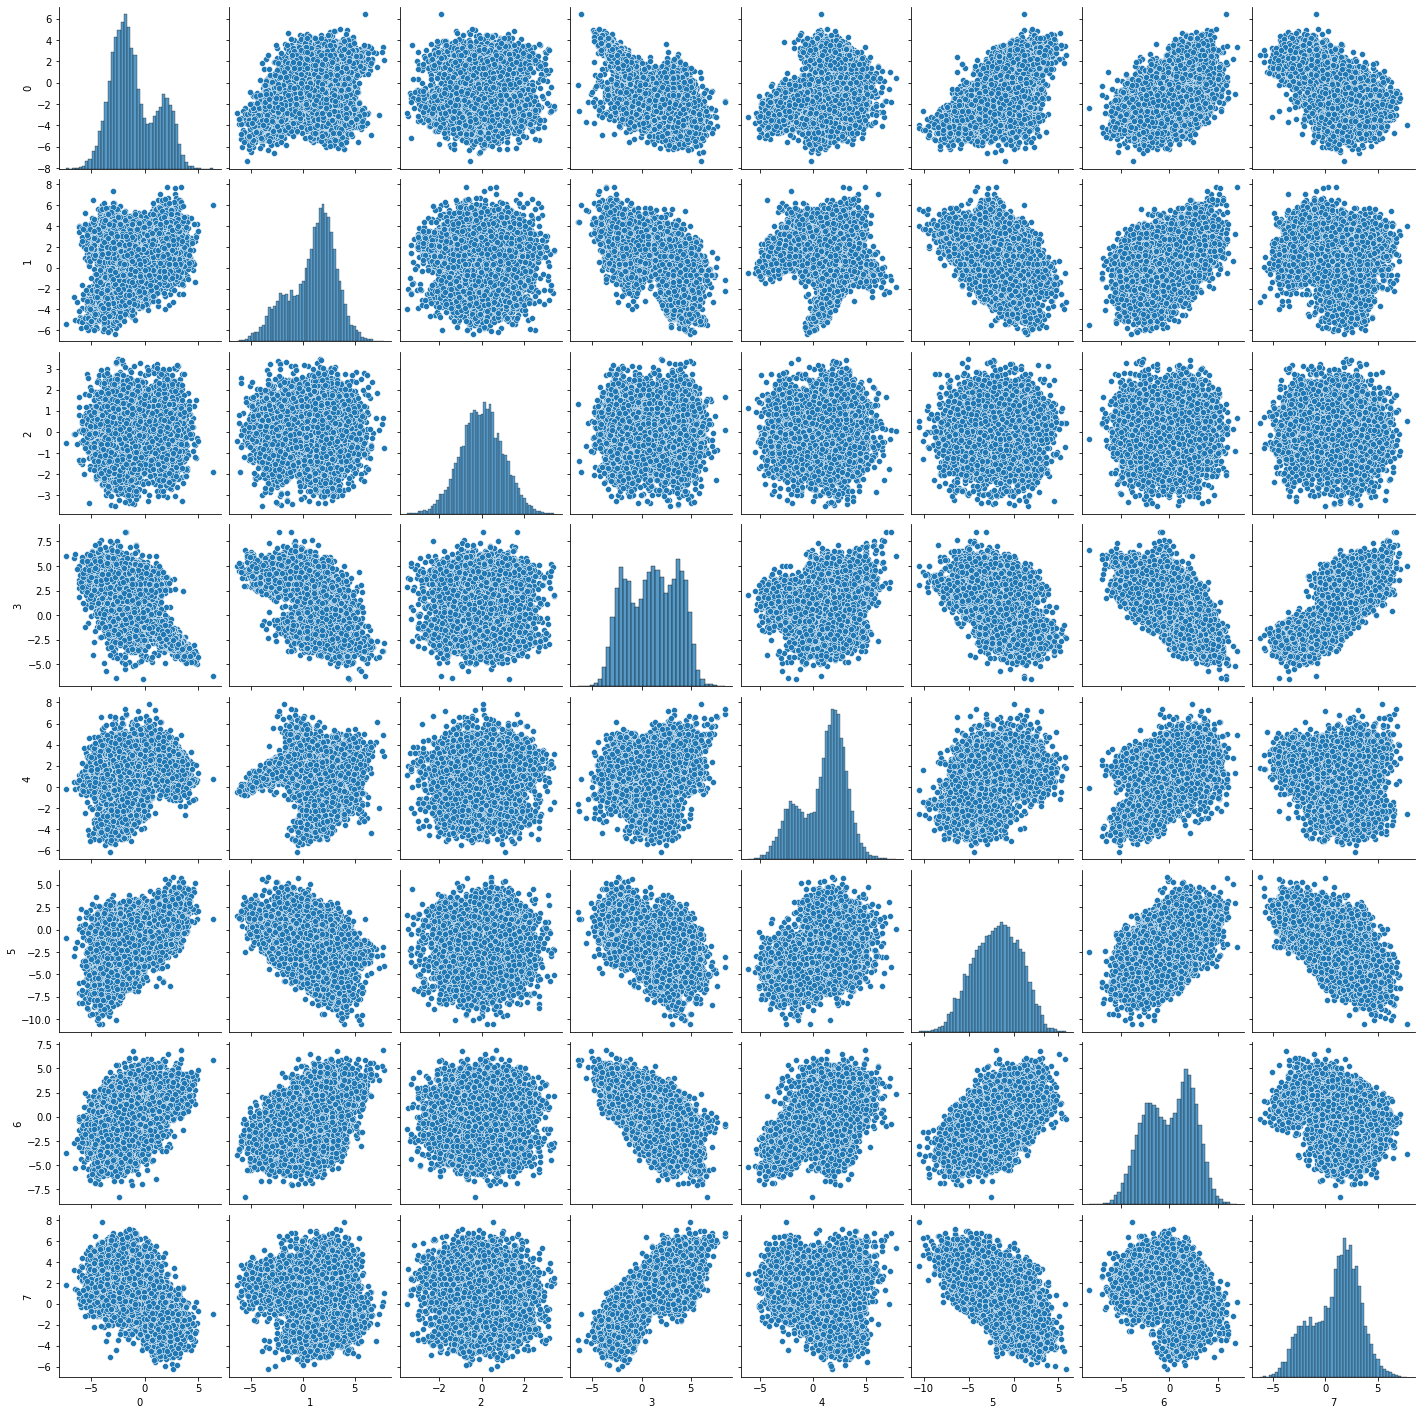

In [20]:
# Visualize data for each feature (pairplot,distplot).
sns.pairplot(X)
plt.show()

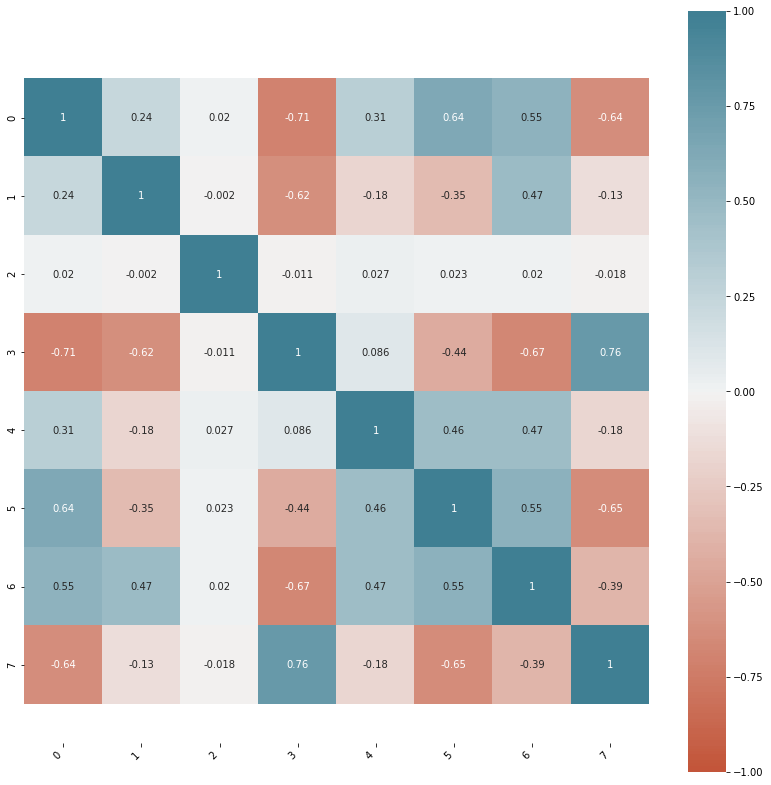

In [22]:
# Draw correlation matrix.
corr = X.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

In [6]:
# Handle outliers (you can use IsolationForest, Z-score, IQR)

Split your dataset into train and test test (0.7 for train and 0.3 for test).

In [23]:
# Split dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [27]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7000, 8), (7000,), (3000, 8), (3000,))

Try Decision Tree and XGBoost Algorithm with different hyperparameters. (Using GridSearchCV is a plus)


In [28]:
# Import Decision Tree, define different hyperparamters and tune the algorithm.
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.963
Accuracy of test: 0.9603333333333334


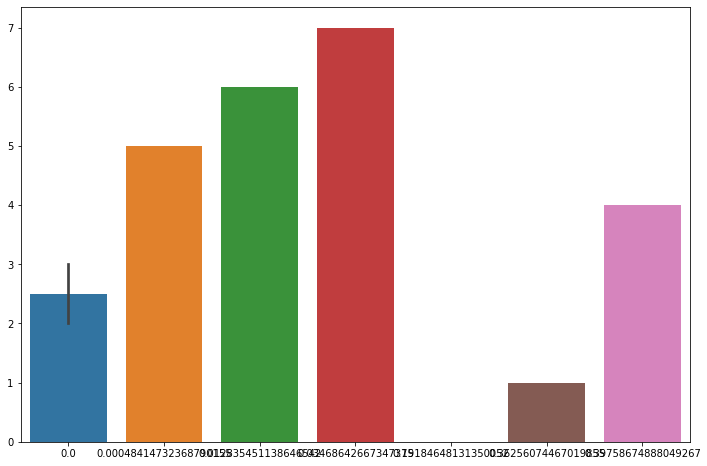

In [54]:
# Visualize feature importances.

plt.figure(figsize=(12, 8))
importance = clf.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.show()

In [47]:
# Create confusion matrix and calculate accuracy, recall, precision and f1 score.

# calculations and conf matrix

pred = clf.predict(X_test)
print(classification_report(y_test,pred))


print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1468
           1       0.98      0.95      0.96      1532

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000

Precision = 0.9604603634673003
Recall = 0.960635418074715
Accuracy = 0.9603333333333334
F1 Score = 0.9603317421954369


In [ ]:
# visualization of confusion matrix
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels( , fontsize = 12)
ax.yaxis.set_ticklabels( , fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [49]:
# Import XGBoostClassifier, define different hyperparamters and tune the algorithm.

dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

param = {'max_depth':3, 
         'eta':1, 
         'objective':'multi:softprob', 
         'num_class':3}

num_round = 5
model = xgb.train(param, dmatrix_train, num_round)

In [50]:
preds = model.predict(dmatrix_test)
preds[:10]

array([[6.6949287e-04, 9.9683541e-01, 2.4950881e-03],
       [9.2055631e-01, 7.5169593e-02, 4.2741285e-03],
       [9.4701064e-01, 4.7617741e-02, 5.3715822e-03],
       [9.6482590e-02, 8.9007705e-01, 1.3440281e-02],
       [3.9863061e-02, 9.4987983e-01, 1.0257102e-02],
       [9.6156418e-01, 3.4993373e-02, 3.4424723e-03],
       [9.9348336e-01, 4.6488331e-03, 1.8677397e-03],
       [6.4159423e-01, 3.4454915e-01, 1.3856624e-02],
       [9.9573487e-01, 2.3931661e-03, 1.8719725e-03],
       [9.8630643e-01, 1.0993802e-02, 2.6998054e-03]], dtype=float32)

In [52]:
best_preds = np.asarray([np.argmax(line) for line in preds])
best_preds

array([1, 0, 0, ..., 1, 0, 1])

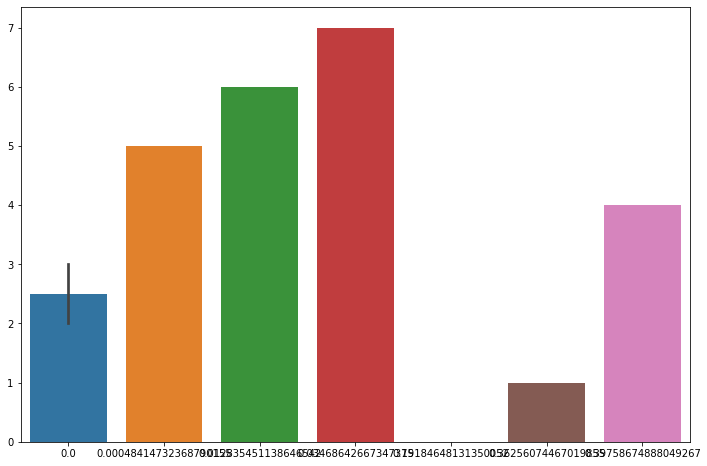

In [55]:
# Visualize feature importances.

plt.figure(figsize=(12, 8))
importance = clf.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.show()

In [56]:
# Create confusion matrix and calculate accuracy, recall, precision and f1 score.

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.98094952102072
Recall = 0.9810553780920739
Accuracy = 0.981


In [ ]:
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, best_preds)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels( , fontsize = 12)
ax.yaxis.set_ticklabels( , fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [ ]:
## Hyperparameter Tuning

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  

param_dict = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'learning_rate': [0.001,0.01,0.1,1],
    'n_estimators': [190,200,210,500,1000]
    
}

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=200, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27)

clf = GridSearchCV(xgc,param_dict,cv=3,n_jobs = -1).fit(X_train,y_train)

print("Tuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))

In [ ]:
plt.figure(figsize=(12, 8))

xgb_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, xgb_pred)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

Make your comments.

In [14]:
# Evaluate your result and select best performing algorithm for our case.

Evaluate your result on both train and test set. Analyse if there is any underfitting or overfitting problem. 